In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
df = pd.read_csv('/media/reindrairawan/New Volume/Data E/REPOSITORY/PYTHON/ProjectKuliah/NLP/ProjectUas(Sentimen_Analisis)/modelSentimen/hasilsentimenenglish.csv')
df.columns = df.columns.str.replace('Unnamed: 0', 'text')
# df['comp_score'] = enc.fit_transform(df['comp_score'].values)
# df['text'] = enc.fit_transform(df['text'].values)
df

,text,neg,neu,pos,compound,comp_score
0,I'm surprised that Citayam Fashion Week is the...,0.140,0.676,0.184,0.2910,pos
1,rt thefirstxxviii nahh even though dri didn't ...,0.064,0.936,0.000,-0.0572,neg
2,"rt valosenadya, let's be honest, scbd fashion ...",0.000,0.602,0.398,0.7650,pos
3,"rt suckerzpunch, this rapper doesn't sell well...",0.068,0.786,0.146,0.2684,pos
4,nasi citayam fashion week videodreamcoid video...,0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...
1444,there's nothing wrong with scbd citayam fashio...,0.000,0.677,0.323,0.9355,pos
1445,the trend called citayam fashion week in scbd ...,0.000,1.000,0.000,0.0000,neu
1446,"RT Vivacoid, Dukuh area full of teenagers, hol...",0.000,1.000,0.000,0.0000,neu
1447,they say scbd fashion week is cool too don't g...,0.000,0.777,0.223,0.8020,pos


In [3]:
datax = df.drop(columns='comp_score')
# datax = df.drop(columns='text')
datay = df['comp_score']
datax

,text,neg,neu,pos,compound
0,I'm surprised that Citayam Fashion Week is the...,0.140,0.676,0.184,0.2910
1,rt thefirstxxviii nahh even though dri didn't ...,0.064,0.936,0.000,-0.0572
2,"rt valosenadya, let's be honest, scbd fashion ...",0.000,0.602,0.398,0.7650
3,"rt suckerzpunch, this rapper doesn't sell well...",0.068,0.786,0.146,0.2684
4,nasi citayam fashion week videodreamcoid video...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
1444,there's nothing wrong with scbd citayam fashio...,0.000,0.677,0.323,0.9355
1445,the trend called citayam fashion week in scbd ...,0.000,1.000,0.000,0.0000
1446,"RT Vivacoid, Dukuh area full of teenagers, hol...",0.000,1.000,0.000,0.0000
1447,they say scbd fashion week is cool too don't g...,0.000,0.777,0.223,0.8020


In [4]:
x=datax["text"]
y=df['comp_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13,
                                                    shuffle=True , stratify=y)
print(y.value_counts())

neu    627
pos    596
neg    226
Name: comp_score, dtype: int64


In [5]:
# vectorize = merubah ke integer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pipe = Pipeline(steps=[('vectorize', CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b')),
                       ('classifier', MultinomialNB())])

pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('classifier', MultinomialNB())])

0.6689655172413793
              precision    recall  f1-score   support

         neg       0.75      0.13      0.23        45
         neu       0.69      0.73      0.71       126
         pos       0.65      0.81      0.72       119

    accuracy                           0.67       290
   macro avg       0.70      0.56      0.55       290
weighted avg       0.68      0.67      0.64       290



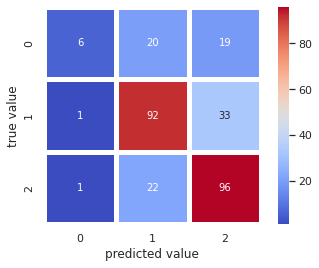

In [6]:
import warnings
warnings.filterwarnings('always') 
y_predict = pipe.predict(x_test)


print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()